In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [3]:
tstart = "2021-09-07 01:00"
tend = "2021-09-07 23:00"

result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

2 Results from the XRSClient:
       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2021-09-07 00:00:00.000 2021-09-07 23:59:59.999        XRS ...   GOES     NOAA
2021-09-07 00:00:00.000 2021-09-07 23:59:59.999        XRS ...   GOES     NOAA




/Users/thomas/opt/miniconda3/lib/python3.9/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [4]:
result[0][0]

Start Time,End Time,Instrument,SatelliteNumber,Physobs,url,Source,Provider
object,object,str3,int64,str10,str161,str4,str4
2021-09-07 00:00:00.000,2021-09-07 23:59:59.999,XRS,16,irradiance,https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-flx1s_science/2021/09/sci_xrsf-l2-flx1s_g16_d20210907_v2-1-0.nc,GOES,NOAA


In [5]:
result_goes16 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16))
print(result_goes16)

NameError: name 'result_goes15' is not defined

In [6]:
file_goes16 = Fido.fetch(result_goes16)

Files Downloaded: 100%|█████████████████████████| 1/1 [00:00<00:00,  1.58file/s]


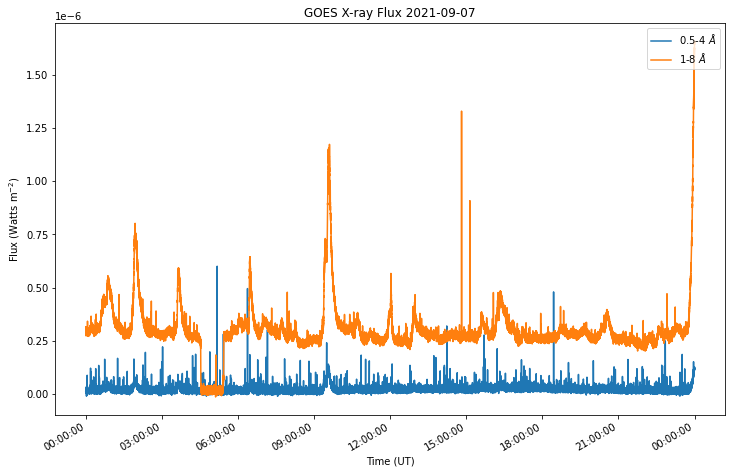

In [7]:
import matplotlib.dates as mdates

sample_path = '/Users/thomas/SS Research Project/week 1'

goes_16 = ts.TimeSeries(file_goes16)

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

goes_16.plot()

ax.set_title('GOES X-ray Flux 2021-09-07')
#ax.set_ylim([10**-9, 10**-2])
ax.set_ylabel("Flux (Watts m$^{-2}$)")
ax.set_xlabel("Time (UT)")

date_format = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(date_format)

plt.legend(('0.5-4 $\AA$', '1-8 $\AA$'), loc='upper right')

# fig.savefig(sample_path + "/GOES_X-ray_plot.png")